In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Task 0
Data extraction: get the data from 3 tables & combine it into single `.csv` file.
After that read this file using pandas to create Dataframe.
So it will be all joined data in 1 dataframe. Quick check - should be 74818 rows in it.

In [4]:
import sqlite3

connection = sqlite3.connect("../db.sqlite3")

query = """
SELECT
    o.id AS order_id,
    o.datetime AS order_datetime,
    oi.id AS orderitem_id,
    oi.quantity AS order_quantity,
    p.id AS product_id,
    p.name AS product_name,
    p.price AS product_price
FROM restaurant_order AS o
JOIN restaurant_orderitem AS oi ON o.id = oi.order_id
JOIN restaurant_product AS p ON oi.product_id = p.id
"""

restaurant_data = pd.read_sql_query(query, connection)

restaurant_data.to_csv("restaurant_data.csv", index=False)

connection.close()

In [7]:
restaurant_data.shape[0]

74818

In [14]:
restaurant_data.head()

,order_id,order_datetime,orderitem_id,order_quantity,product_id,product_name,product_price
0,1,2019-08-03 20:25:00,1,2,6,Plain Papadum,0.80
1,1,2019-08-03 20:25:00,2,1,240,King Prawn Balti,12.95
2,1,2019-08-03 20:25:00,3,1,19,Garlic Naan,2.95
3,1,2019-08-03 20:25:00,4,1,36,Mushroom Rice,3.95
4,1,2019-08-03 20:25:00,5,1,111,Paneer Tikka Masala,8.95


# Task 1
Get Top 10 most popular products in restaurant sold by Quantity.
Count how many times each product was sold and create a pie chart with percentage of popularity (by quantity) for top 10 of them.

Example:

![pie chart](../demo/pie.png)

In [18]:
sales = restaurant_data.groupby(restaurant_data["product_name"])["order_quantity"].sum()

sales.head()

product_name
Aloo Chaat             316
Aloo Gobi              620
Aloo Methi              44
Baingan Hari Mirch     199
Bengal Fish Biryani     45
Name: order_quantity, dtype: int64

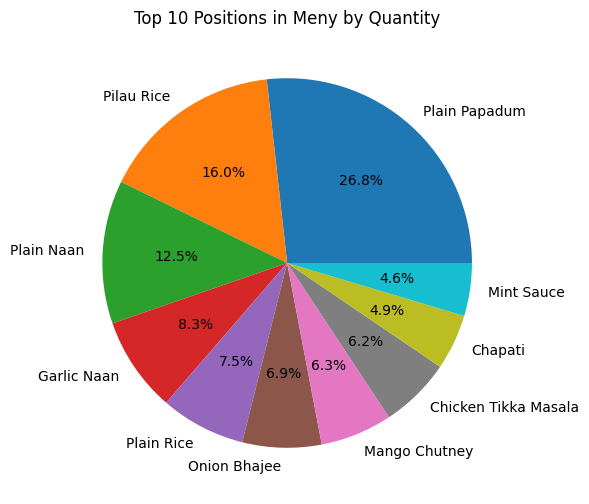

In [34]:
top_10_products = sales.sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 6))
plt.pie(top_10_products, labels=top_10_products.index, autopct="%1.1f%%")
plt.title("Top 10 Positions in Meny by Quantity")
plt.show()

# Task 2
Calculate `Item Price` (Product Price * Quantity) for each Order Item in dataframe.
And Make the same Top 10 pie chart, but this time by `Item Price`. So this chart should describe not the most popular products by quantity, but which products (top 10) make the most money for restaurant. It should be also with percentage.

In [35]:
restaurant_data["item_price"] = restaurant_data["product_price"] * restaurant_data["order_quantity"]

In [36]:
sales_money = restaurant_data.groupby(restaurant_data["product_name"])["item_price"].sum()

sales_money.head()

product_name
Aloo Chaat             1564.20
Aloo Gobi              3689.00
Aloo Methi              261.80
Baingan Hari Mirch     1184.05
Bengal Fish Biryani     582.75
Name: item_price, dtype: float64

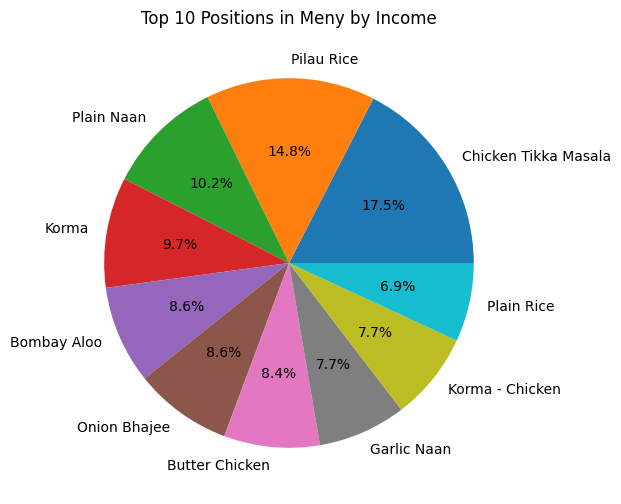

In [38]:
top_10_products = sales_money.sort_values(ascending=False).head(10)

plt.figure(figsize=(6, 6))
plt.pie(top_10_products, labels=top_10_products.index, autopct="%1.1f%%")
plt.title("Top 10 Positions in Meny by Income")
plt.show()

# Task 3
Calculate `Order Hour` based on `Order Datetime`, which will tell about the specific our the order was created (from 0 to 23). Using `Order Hour` create a bar chart, which will tell the total restaurant income based on the hour order was created. So on x-axis - it will be values from 0 to 23 (hours), on y-axis - it will be the total sum of order prices, which were sold on that hour.

Example:

![bar chart](../demo/bar.png)

In [47]:
restaurant_data["order_datetime"] = pd.to_datetime(restaurant_data["order_datetime"])
restaurant_data["order_hour"] = restaurant_data["order_datetime"].dt.hour

restaurant_data.head()

,order_id,order_datetime,orderitem_id,order_quantity,product_id,product_name,product_price,item_price,order_hour
0,1,2019-08-03 20:25:00,1,2,6,Plain Papadum,0.80,1.60,20
1,1,2019-08-03 20:25:00,2,1,240,King Prawn Balti,12.95,12.95,20
2,1,2019-08-03 20:25:00,3,1,19,Garlic Naan,2.95,2.95,20
3,1,2019-08-03 20:25:00,4,1,36,Mushroom Rice,3.95,3.95,20
4,1,2019-08-03 20:25:00,5,1,111,Paneer Tikka Masala,8.95,8.95,20


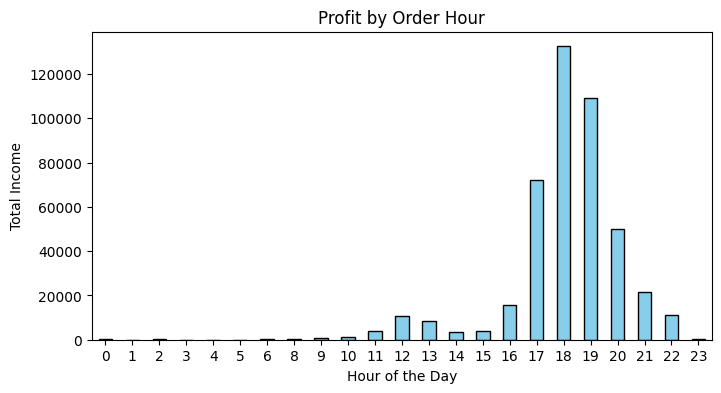

In [48]:
hourly_income = restaurant_data.groupby("order_hour")["item_price"].sum()

plt.figure(figsize=(8, 4))
hourly_income.plot(kind="bar", color="skyblue", edgecolor="black")
plt.xlabel("Hour of the Day")
plt.ylabel("Total Income")
plt.title("Profit by Order Hour")
plt.xticks(rotation=0)
plt.show()

# Task 4
Make similar bar chart, but right now with `Order Day Of The Week` (from Monday to Sunday), and also analyze total restaurant income by each day of the week.

In [50]:
restaurant_data["order_day"] = restaurant_data["order_datetime"].dt.day_name()

restaurant_data.head()

,order_id,order_datetime,orderitem_id,order_quantity,product_id,product_name,product_price,item_price,order_hour,order_day
0,1,2019-08-03 20:25:00,1,2,6,Plain Papadum,0.80,1.60,20,Saturday
1,1,2019-08-03 20:25:00,2,1,240,King Prawn Balti,12.95,12.95,20,Saturday
2,1,2019-08-03 20:25:00,3,1,19,Garlic Naan,2.95,2.95,20,Saturday
3,1,2019-08-03 20:25:00,4,1,36,Mushroom Rice,3.95,3.95,20,Saturday
4,1,2019-08-03 20:25:00,5,1,111,Paneer Tikka Masala,8.95,8.95,20,Saturday


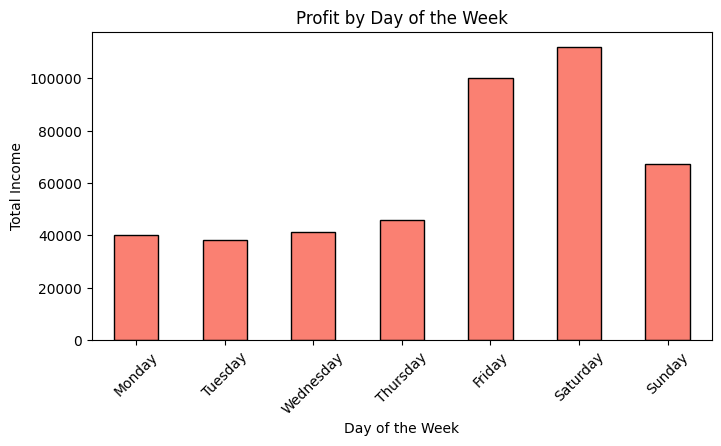

In [56]:
weekday_income = restaurant_data.groupby("order_day")["item_price"].sum()
weekday_income = weekday_income.reindex(["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"])

plt.figure(figsize=(8, 4))
weekday_income.plot(kind="bar", color="salmon", edgecolor="black")
plt.xlabel("Day of the Week")
plt.ylabel("Total Income")
plt.title("Profit by Day of the Week")
plt.xticks(rotation=45)
plt.show()
